# Feature Transformation

## Feature Scaling

Definition : A technique to standardize the independent features present in the data in a fixed range.

Note: use feature scaling just before model building.

### Standardization(or z-score normalization)
Definition : Technique to rescale features values with distribution value between 0 and 1 useful for optimization algorithms.<br>
Formula : x_new=(x_old-x_mean)/std. dev.<br>
Motive : mean centering, scaling by factor of standard deviation.

Topics covered:<br>
1. How to Standardize?<br>
2. Why is Scaling important?<br>
3. Effect of Standardization on Outliers.<br>
4. When to and when not to use Standardization?<br>
5. Why Standardization is known as z-score normalization?

In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df1=pd.read_csv('Social_Network_Ads.csv')

#first 5 rows of dataframe
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Remove unneccessary features: Here they are: User ID, Gender
df1 = df1.iloc[:,2:]

### Standard Scaling

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1), df1['Purchased'], test_size=0.3, random_state= 0)

In [5]:
#Shapes 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [6]:
#standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fit the scaler to the X_Train to learn from the features:
scaler.fit(X_train)
# transform train and test sets
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [7]:
#by-default standardization converts dataframe into array
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [8]:
#so we need to convert back array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Why Scaling is Important?

Here, we have taken examples of two algorithms<br>
logistic regression: we will see change in accurary before and after scaling.<br>
Decision Tree : we won't see much change in accuracy before and after scaliing.

### So we conclude, on applying scaling there is no loss in accuracy but profit depends on type of algorithm

#### LogisticRegression

In [9]:
#Performing Logistic regesssion on the data set
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr_scaled=LogisticRegression()
#observation:created 2 objects(lr and lr_scaled) of LogisticRegression

In [10]:
#fit algorithms on before and after scaled data
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
#calculated predicted values of test data before and after scaling
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [12]:
#Find the accuracies of the model predection before and after the scaling:
from sklearn.metrics import accuracy_score
print("Before scaling the accuracy score:", accuracy_score(y_test, y_pred))
print("After Scalaling Accuracy : ",accuracy_score(y_test, y_pred_scaled))
#observation:there is huge increase in accuracy score after scaling

Before scaling the accuracy score: 0.6583333333333333
After Scalaling Accuracy :  0.8666666666666667


### DecisionTreeClassifier

In [13]:
#Decision tree classifier:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
#observation:created 2 objects(lr and lr_scaled) of LogisticRegression

In [14]:
#Fit the algorithms before and after the scaling 
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [15]:
#Predcting the algorithms with and without the scaling
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [16]:
#Find the accuracies of tha algorithm before and after thw scaling
print("Accuracy of the algorithm before scaling:", accuracy_score(y_test, y_pred))
print("Accuracy after scaling", accuracy_score(y_test, y_pred_scaled))
#observation:there is approximately no increase in accuracy score after scaling

Accuracy of the algorithm before scaling: 0.875
Accuracy after scaling 0.8666666666666667


### Effect of Standardization on Outliers

In [17]:
#there are no outliers in the given data set. We can add three outliers in each column:

df1 = df1.append(pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,250000,350000],"Purchased":[0,1,1]}),ignore_index=True)

C:\Users\22789\AppData\Local\Temp\1\ipykernel_19576\2470260365.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,250000,350000],"Purchased":[0,1,1]}),ignore_index=True)


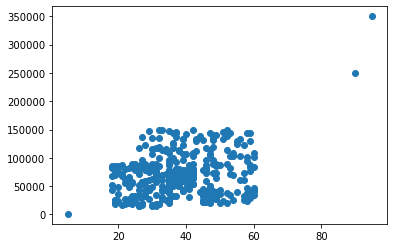

In [18]:
#scatter plot of 'Age' and 'EstimatedSalary'
plt.scatter(df1['Age'], df1['EstimatedSalary'])
#observation-->yes, now we can see outliers

In [19]:
#recommended(train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1), df1['Purchased'], test_size=0.3, random_state=0)

In [20]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [21]:
#By-default StandardScalar converts dataframes into arrays, so we need to convert them back
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Text(0.5, 1.0, 'after scaling')

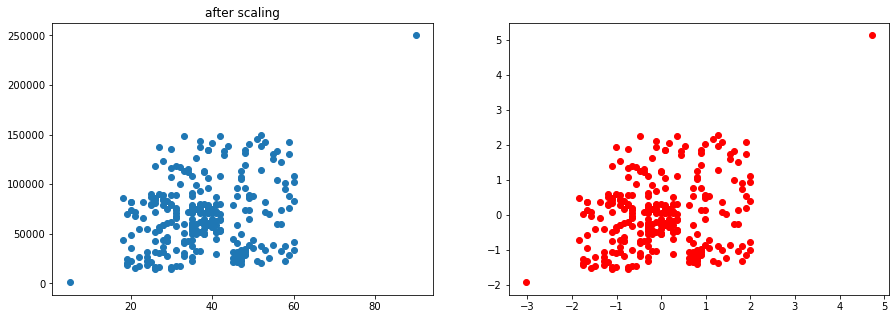

In [22]:
#Scatter plots of 'Age' and 'EstimatedSalary' before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('before scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax1.set_title('after scaling')

#Observation:outlier is still outlier, means there is no impact of scaling on outliers
#Note:out of 3 outliers added, 1 is gone into test data(so, don't get confused)

#### So we have to handle outliers explicitly.

### Algorithms to use standard scaling:

There is no loss in using Standardization, but profit depends on type of algorithm.

Algorithms: whenever you see these algorithms, use standardization scaling technique.

K-Means : Use Euclidean Distance measure.<br>
K-Nearest-Neighbours : measure distance between pairs of samples and these distances are influenced by measurement units<br>
Principal Component Analysis : To get feature with maximum variance<br>
Artificial Neural Network : Apply Gradient Descent<br>
Gradient Descent : Theta calculation becomes faster after feature scaling and learning rate in update equation of Stochastic gradient descent is the same for every parameter.<br>

### When there is no need to use Standardization?

Decision tree<br>
Random Forest<br>
Gradient Boost<br>
XG Boost

### Why Standardization is known as z-score normalization?
Because it returns a normalized value(z-score) based on mean and standard deviation.